In [141]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [142]:
batch_size=32
num_classes = 5
epochs = 6

In [143]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    directory='/content/drive/MyDrive/Vegetable_Images',
    labels='inferred',
    label_mode='categorical',
    shuffle=True,
    batch_size=batch_size,
    image_size=(224, 224),
    validation_split=0.2,
    seed=1234,
    subset="training")

validation_ds = tf.keras.utils.image_dataset_from_directory(
    directory='/content/drive/MyDrive/Vegetable_Images',
    labels='inferred',
    label_mode='categorical',
    shuffle=True,
    batch_size=batch_size,
    image_size=(224, 224),
    seed=1234,
    validation_split=0.2,
    subset="validation")

Found 2476 files belonging to 5 classes.
Using 1981 files for training.
Found 2476 files belonging to 5 classes.
Using 495 files for validation.


Classes

In [144]:
class_names = train_ds.class_names
print(class_names)

['Brinjal', 'Broccoli', 'Carrot', 'Cauliflower', 'Pumpkin']


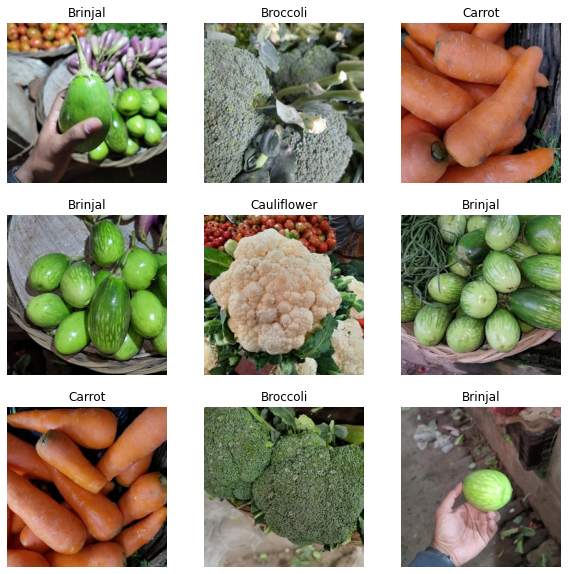

In [145]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[np.where(labels[i]==1)[0][0]])
    plt.axis("off")

The data set we are using is separated into 5 different groups, Carrots, Eggplants, Cauliflower, Broccoli, and Pumpkin. 

There are 500 images of each vegetable that is separated into train and test, and then we try and predict which vegetable it is based on the picture given. The model should be able to accurately predict the type of vegetable given the picture of it, despite the pictures being from different angles and each one of a different vegetable.


# Sequential Model

In [146]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(num_classes, activation='softmax'),
])

In [147]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 150528)            0         
                                                                 
 dense_16 (Dense)            (None, 512)               77070848  
                                                                 
 dropout_12 (Dropout)        (None, 512)               0         
                                                                 
 dense_17 (Dense)            (None, 512)               262656    
                                                                 
 dropout_13 (Dropout)        (None, 512)               0         
                                                                 
 dense_18 (Dense)            (None, 5)                 2565      
                                                                 
Total params: 77,336,069
Trainable params: 77,336,069


In [148]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

history = model.fit(train_ds,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=validation_ds)


Epoch 1/6
62/62 [==============================] - 53s 819ms/step - loss: 13138.8555 - accuracy: 0.2489 - val_loss: 1.5870 - val_accuracy: 0.2323
Epoch 2/6
62/62 [==============================] - 50s 794ms/step - loss: 142.0521 - accuracy: 0.2009 - val_loss: 1.6388 - val_accuracy: 0.2283
Epoch 3/6
62/62 [==============================] - 50s 793ms/step - loss: 14.0615 - accuracy: 0.2049 - val_loss: 1.5978 - val_accuracy: 0.1818
Epoch 4/6
62/62 [==============================] - 51s 817ms/step - loss: 48.7616 - accuracy: 0.2135 - val_loss: 1.6116 - val_accuracy: 0.1737
Epoch 5/6
62/62 [==============================] - 50s 792ms/step - loss: 8.0750 - accuracy: 0.2135 - val_loss: 1.6083 - val_accuracy: 0.1758
Epoch 6/6
62/62 [==============================] - 50s 808ms/step - loss: 1.6102 - accuracy: 0.2095 - val_loss: 1.6085 - val_accuracy: 0.1758


In [149]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

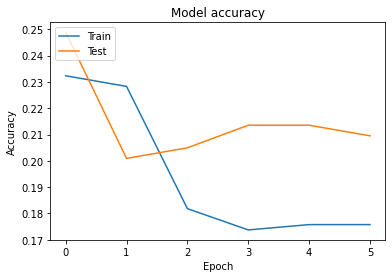

In [150]:
# Plot training & validation accuracy values
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [151]:
score = model.evaluate(validation_ds, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Test loss: 1.6085116863250732
Test accuracy: 0.17575757205486298


# CNN

In [152]:
num_filters = 8
filter_size = 3
pool_size = 2

In [153]:
model2 = tf.keras.models.Sequential(
    [
        tf.keras.Input(shape=(224, 224, 3)),
        tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(num_classes, activation="softmax"),
    ]
)

In [154]:
model2.summary()


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 flatten_7 (Flatten)         (None, 186624)            0         
                                                                 
 dropout_14 (Dropout)        (None, 186624)           

In [155]:
model2.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history2 = model2.fit(train_ds,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=validation_ds)

Epoch 1/6
62/62 [==============================] - 148s 2s/step - loss: 121.2345 - accuracy: 0.4513 - val_loss: 1.0485 - val_accuracy: 0.5980
Epoch 2/6
62/62 [==============================] - 145s 2s/step - loss: 0.6305 - accuracy: 0.7885 - val_loss: 0.8122 - val_accuracy: 0.7111
Epoch 3/6
62/62 [==============================] - 145s 2s/step - loss: 0.2708 - accuracy: 0.9172 - val_loss: 0.9692 - val_accuracy: 0.7455
Epoch 4/6
62/62 [==============================] - 145s 2s/step - loss: 0.2871 - accuracy: 0.9167 - val_loss: 1.3442 - val_accuracy: 0.6162
Epoch 5/6
62/62 [==============================] - 145s 2s/step - loss: 0.2277 - accuracy: 0.9273 - val_loss: 1.7128 - val_accuracy: 0.6788
Epoch 6/6
62/62 [==============================] - 145s 2s/step - loss: 0.1583 - accuracy: 0.9616 - val_loss: 1.5140 - val_accuracy: 0.6828


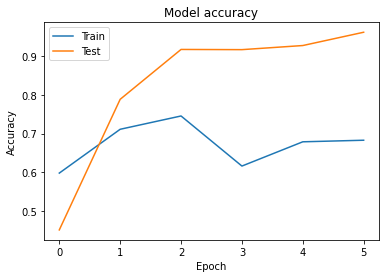

In [156]:
# Plot training & validation accuracy values
plt.plot(history2.history['val_accuracy'])
plt.plot(history2.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [157]:
score = model2.evaluate(validation_ds, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Test loss: 1.513954520225525
Test accuracy: 0.6828283071517944


# Pretrained Model and Transfer Learning

In [158]:
IMG_SIZE = (224, 224)

In [159]:
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input

In [160]:
rescale = tf.keras.layers.Rescaling(1./127.5, offset=-1)

In [161]:
# Create the base model from the pre-trained model MobileNet V2
IMG_SHAPE = IMG_SIZE + (3,)
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

In [162]:
image_batch, label_batch = next(iter(train_ds))
feature_batch = base_model(image_batch)
print(feature_batch.shape)

(32, 7, 7, 1280)


In [163]:
base_model.trainable = False


In [164]:
# Let's take a look at the base model architecture
base_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_7[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

In [165]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

(32, 1280)


In [166]:
prediction_layer = tf.keras.layers.Dense(5)
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

(32, 5)


In [167]:
inputs = tf.keras.Input(shape=(224, 224, 3))
x = preprocess_input(inputs)
x = base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model3 = tf.keras.Model(inputs, outputs)

In [168]:
base_learning_rate = 0.0001
model3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [169]:
model3.summary()


Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 tf.math.truediv_2 (TFOpLamb  (None, 224, 224, 3)      0         
 da)                                                             
                                                                 
 tf.math.subtract_2 (TFOpLam  (None, 224, 224, 3)      0         
 bda)                                                            
                                                                 
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d_1   (None, 1280)             0         
 (GlobalAveragePooling2D)                                  

In [170]:
len(model3.trainable_variables)


2

In [171]:
initial_epochs = 6

loss0, accuracy0 = model3.evaluate(validation_ds)

16/16 [==============================] - 18s 965ms/step - loss: 1.5676 - accuracy: 0.3131


In [172]:
print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0))

initial loss: 1.57
initial accuracy: 0.31


In [173]:
history = model3.fit(train_ds,
                    epochs=initial_epochs,
                    validation_data=validation_ds)

Epoch 1/6
62/62 [==============================] - 84s 1s/step - loss: 1.2277 - accuracy: 0.5396 - val_loss: 0.7501 - val_accuracy: 0.8929
Epoch 2/6
62/62 [==============================] - 79s 1s/step - loss: 0.6301 - accuracy: 0.8884 - val_loss: 0.4014 - val_accuracy: 0.9717
Epoch 3/6
62/62 [==============================] - 81s 1s/step - loss: 0.3827 - accuracy: 0.9500 - val_loss: 0.2477 - val_accuracy: 0.9919
Epoch 4/6
62/62 [==============================] - 79s 1s/step - loss: 0.2501 - accuracy: 0.9793 - val_loss: 0.1720 - val_accuracy: 0.9919
Epoch 5/6
62/62 [==============================] - 81s 1s/step - loss: 0.1846 - accuracy: 0.9884 - val_loss: 0.1282 - val_accuracy: 0.9919
Epoch 6/6
62/62 [==============================] - 84s 1s/step - loss: 0.1393 - accuracy: 0.9874 - val_loss: 0.1017 - val_accuracy: 0.9919


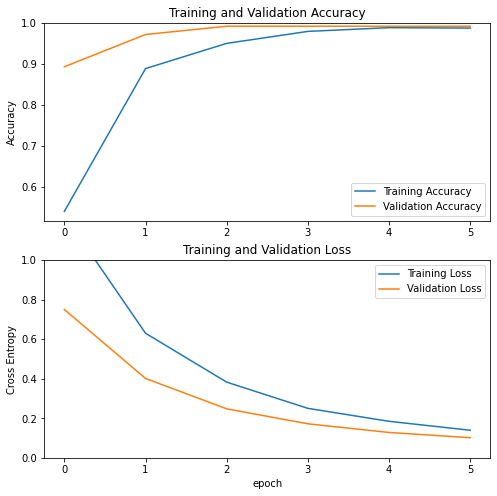

In [174]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [175]:
score = model3.evaluate(validation_ds, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.1016954705119133
Test accuracy: 0.991919219493866


# Analysis

We tried three different approaches for training to predict this data, Sequential, CNN, and a Pretrained model with transfer learning. 
 
> The worst performing of the three was definitely sequential with an accuracy of .18 and a loss of 1.61, a result that clearly shows that sequential is not a good decision for this data. 

The other two methods were closer together in accuracy and loss, with one just barely better than the other. 

> CNN is the slightly worse one with a decent accuracy of .68 but with a subpar loss of 1.51, meaning that while it is accurate most of the time it is often wildly wrong.


> The best of the three is easily the pretrained model with an exceptional accuracy of .992 and a loss of .1, showing that it is nearly always right and that even when it is wrong, it isn’t too far off from being correct. 


This result is likely to do with the fact that the pretrained model was using the MobileNet V2 from google that had been previously trained on 1.4 million images. This previous training means that it is very good at predictions and should easily outclass the other two. The CNN model might be able to catch up to it if given enough data entries and more epochs, however with our limited data and computing processing power, it would be impossible for us to match up with the power of the Google trained model.